In [188]:
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
from decimal import *
import warnings
warnings.filterwarnings('ignore')


## Data Read 

#### Reading the Dataset

In [189]:
bike_raw_dataframe=pandas.read_csv("/Users/karanprinja/Downloads/day.csv")
bike_raw_dataframe.shape


(730, 16)

#### Printing the Columns

In [190]:
bike_raw_dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Printing the dataframe to get overview

In [191]:
bike_raw_dataframe.head().append(bike_raw_dataframe.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## Data Cleaning

#### Checking for columnwise Null Values

In [192]:
bike_raw_dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dropping all the rows having all Null Values

In [193]:
bike_raw_dataframe.dropna(axis=0,thresh=16,inplace=True)

#### Printing Dataframe shape

In [194]:
bike_raw_dataframe.shape

(730, 16)

#### Finding columns having unique values

In [195]:
bike_raw_dataframe.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Dropping columns 'instant','dteday','casual','registered' as per the information from the above execution as well as the information
#### shared in data dictionary

In [196]:
bike_raw_dataframe.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

#### Creating Labels of the columns as per Data Dictionary. We are only applying labels to non-binary columns.Columns such
#### as WorkingDay,Holiday,Year have been excluded

In [197]:
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { 
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow_rain',
    4 : 'Heavy snow_rain'
}



#### Applying Labels to the Values present in Categorical Columns

In [198]:
bike_raw_dataframe['season']=bike_raw_dataframe['season'].map(season_labels)
bike_raw_dataframe['mnth']=bike_raw_dataframe['mnth'].map(mnth_labels)
bike_raw_dataframe['weekday']=bike_raw_dataframe['weekday'].map(weekday_labels)
bike_raw_dataframe['weathersit']=bike_raw_dataframe['weathersit'].map(weathersit_labels)



In [199]:
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
numerical_vars=['temp','atemp','hum','windspeed','cnt']

#### Printing Values to confirm if labels have been applied

In [200]:
bike_raw_dataframe.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis

#### Plotting Graph between Season and Count.To observe relation between them

<Axes: xlabel='yr', ylabel='cnt'>

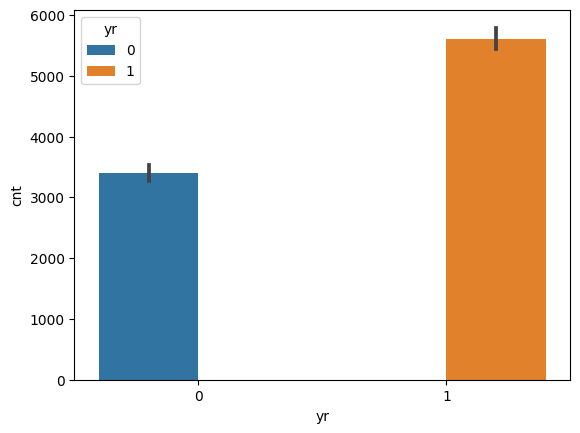

In [201]:
seaborn.barplot(x='yr',y='cnt',data=bike_raw_dataframe,hue='yr')

#### Plotting Graph between Month and Count.To observe relation between them

<Axes: xlabel='mnth', ylabel='cnt'>

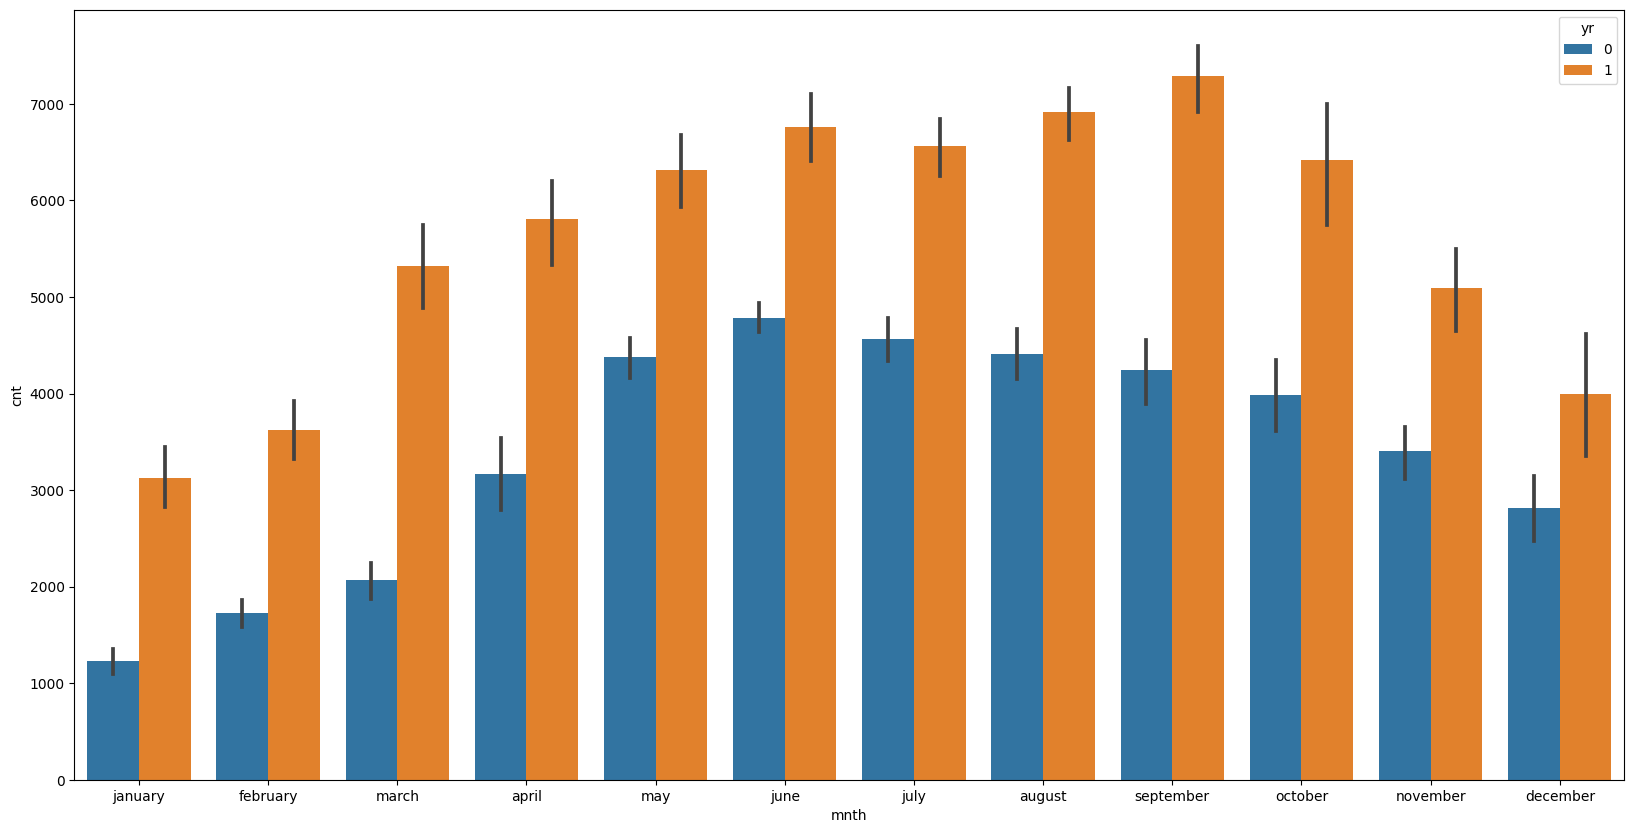

In [202]:
plt.figure(figsize=(20,10))
seaborn.barplot(x='mnth',y='cnt',data=bike_raw_dataframe,hue='yr')

#### Plotting Graph between Weekday and Count.To observe relation between them

<Axes: xlabel='weekday', ylabel='cnt'>

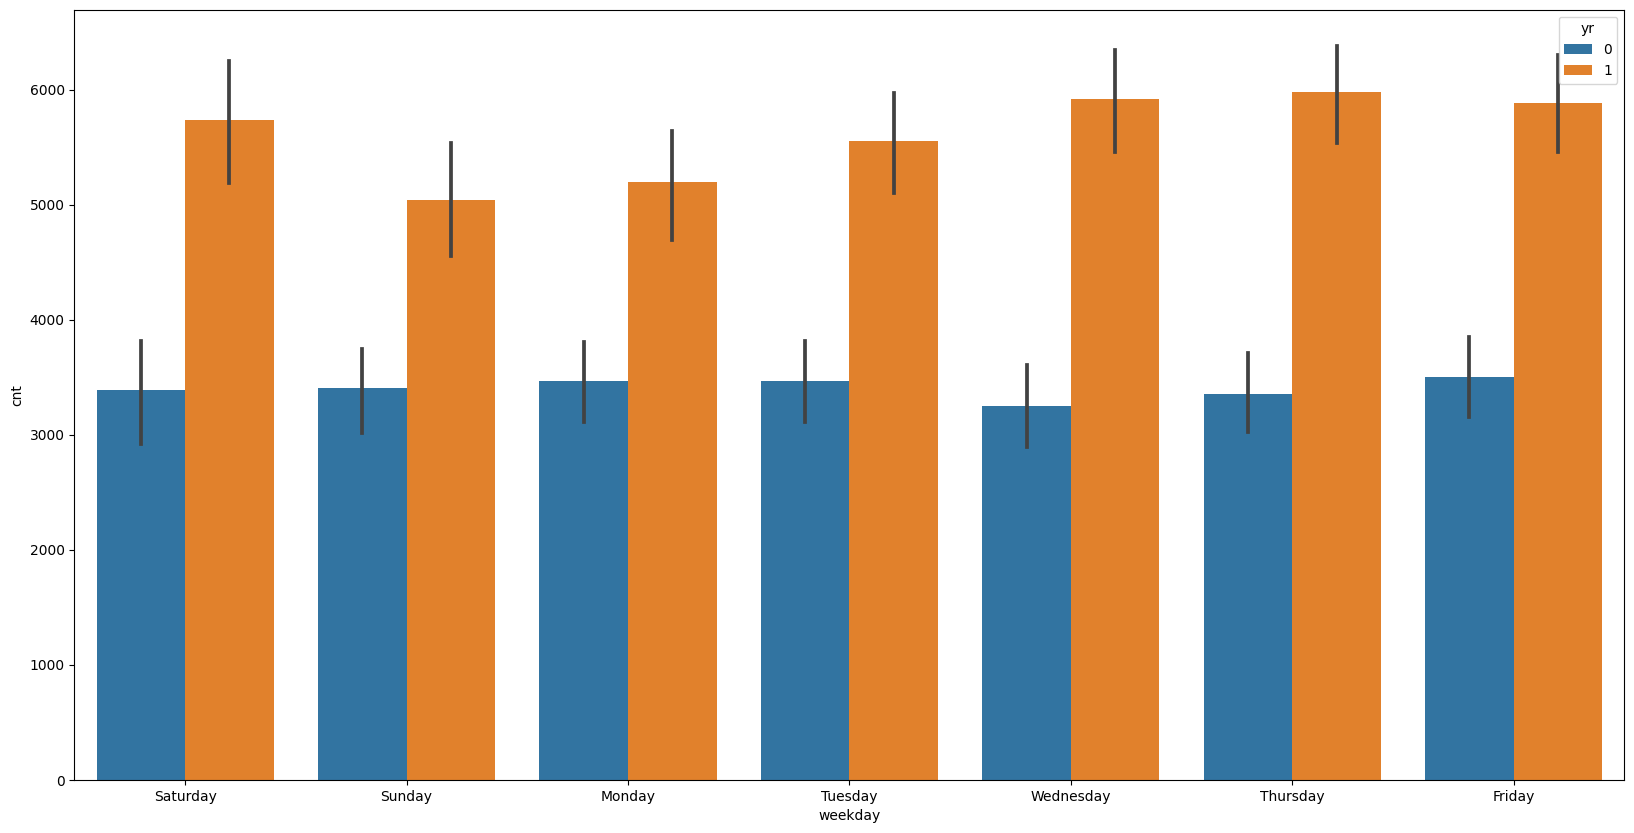

In [203]:
plt.figure(figsize=(20,10))
seaborn.barplot(x='weekday',y='cnt',data=bike_raw_dataframe,hue='yr')

#### Plotting Graph between Season and Count.To observe relation between them

<Axes: xlabel='season', ylabel='cnt'>

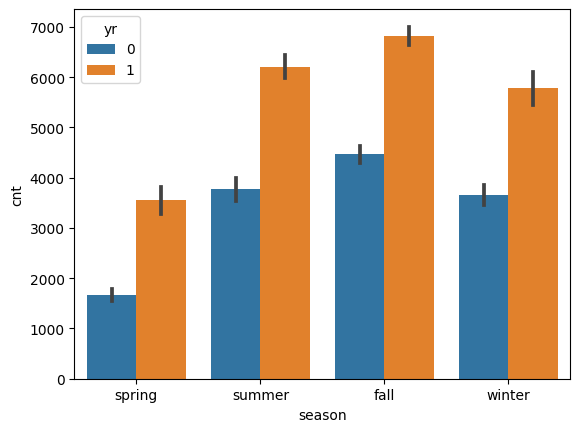

In [204]:

seaborn.barplot(x='season',y='cnt',data=bike_raw_dataframe,hue='yr')

#### Plotting Graph to observe behvior between different weather and demand for bike

<Axes: xlabel='weathersit', ylabel='cnt'>

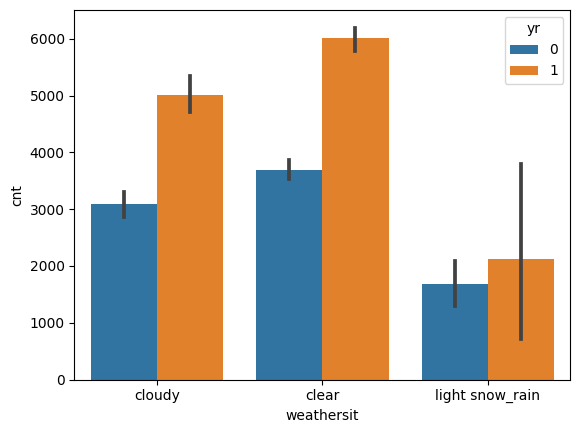

In [205]:
seaborn.barplot(x='weathersit',y='cnt',data=bike_raw_dataframe,hue='yr')

#### Plotting Graph between Numerical Variables and Count.To observe relation between them

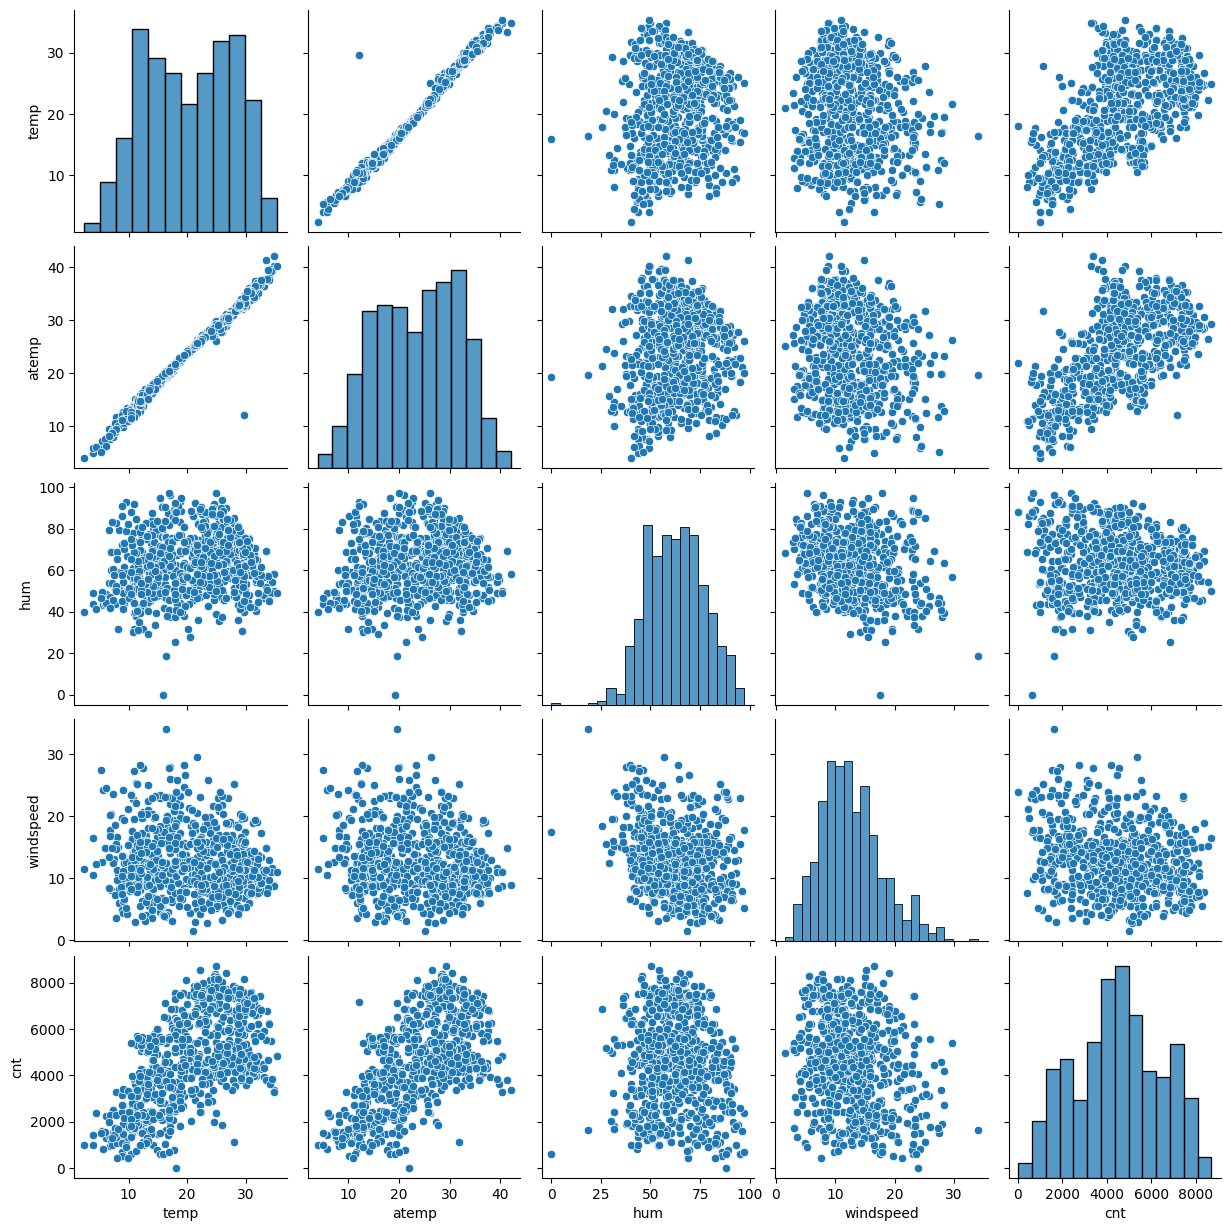

In [206]:
seaborn.pairplot(data=bike_raw_dataframe,vars=numerical_vars)

#### Plotting a Graph between Categorical Variables and Count.To remove outliers

<Axes: xlabel='weathersit', ylabel='cnt'>

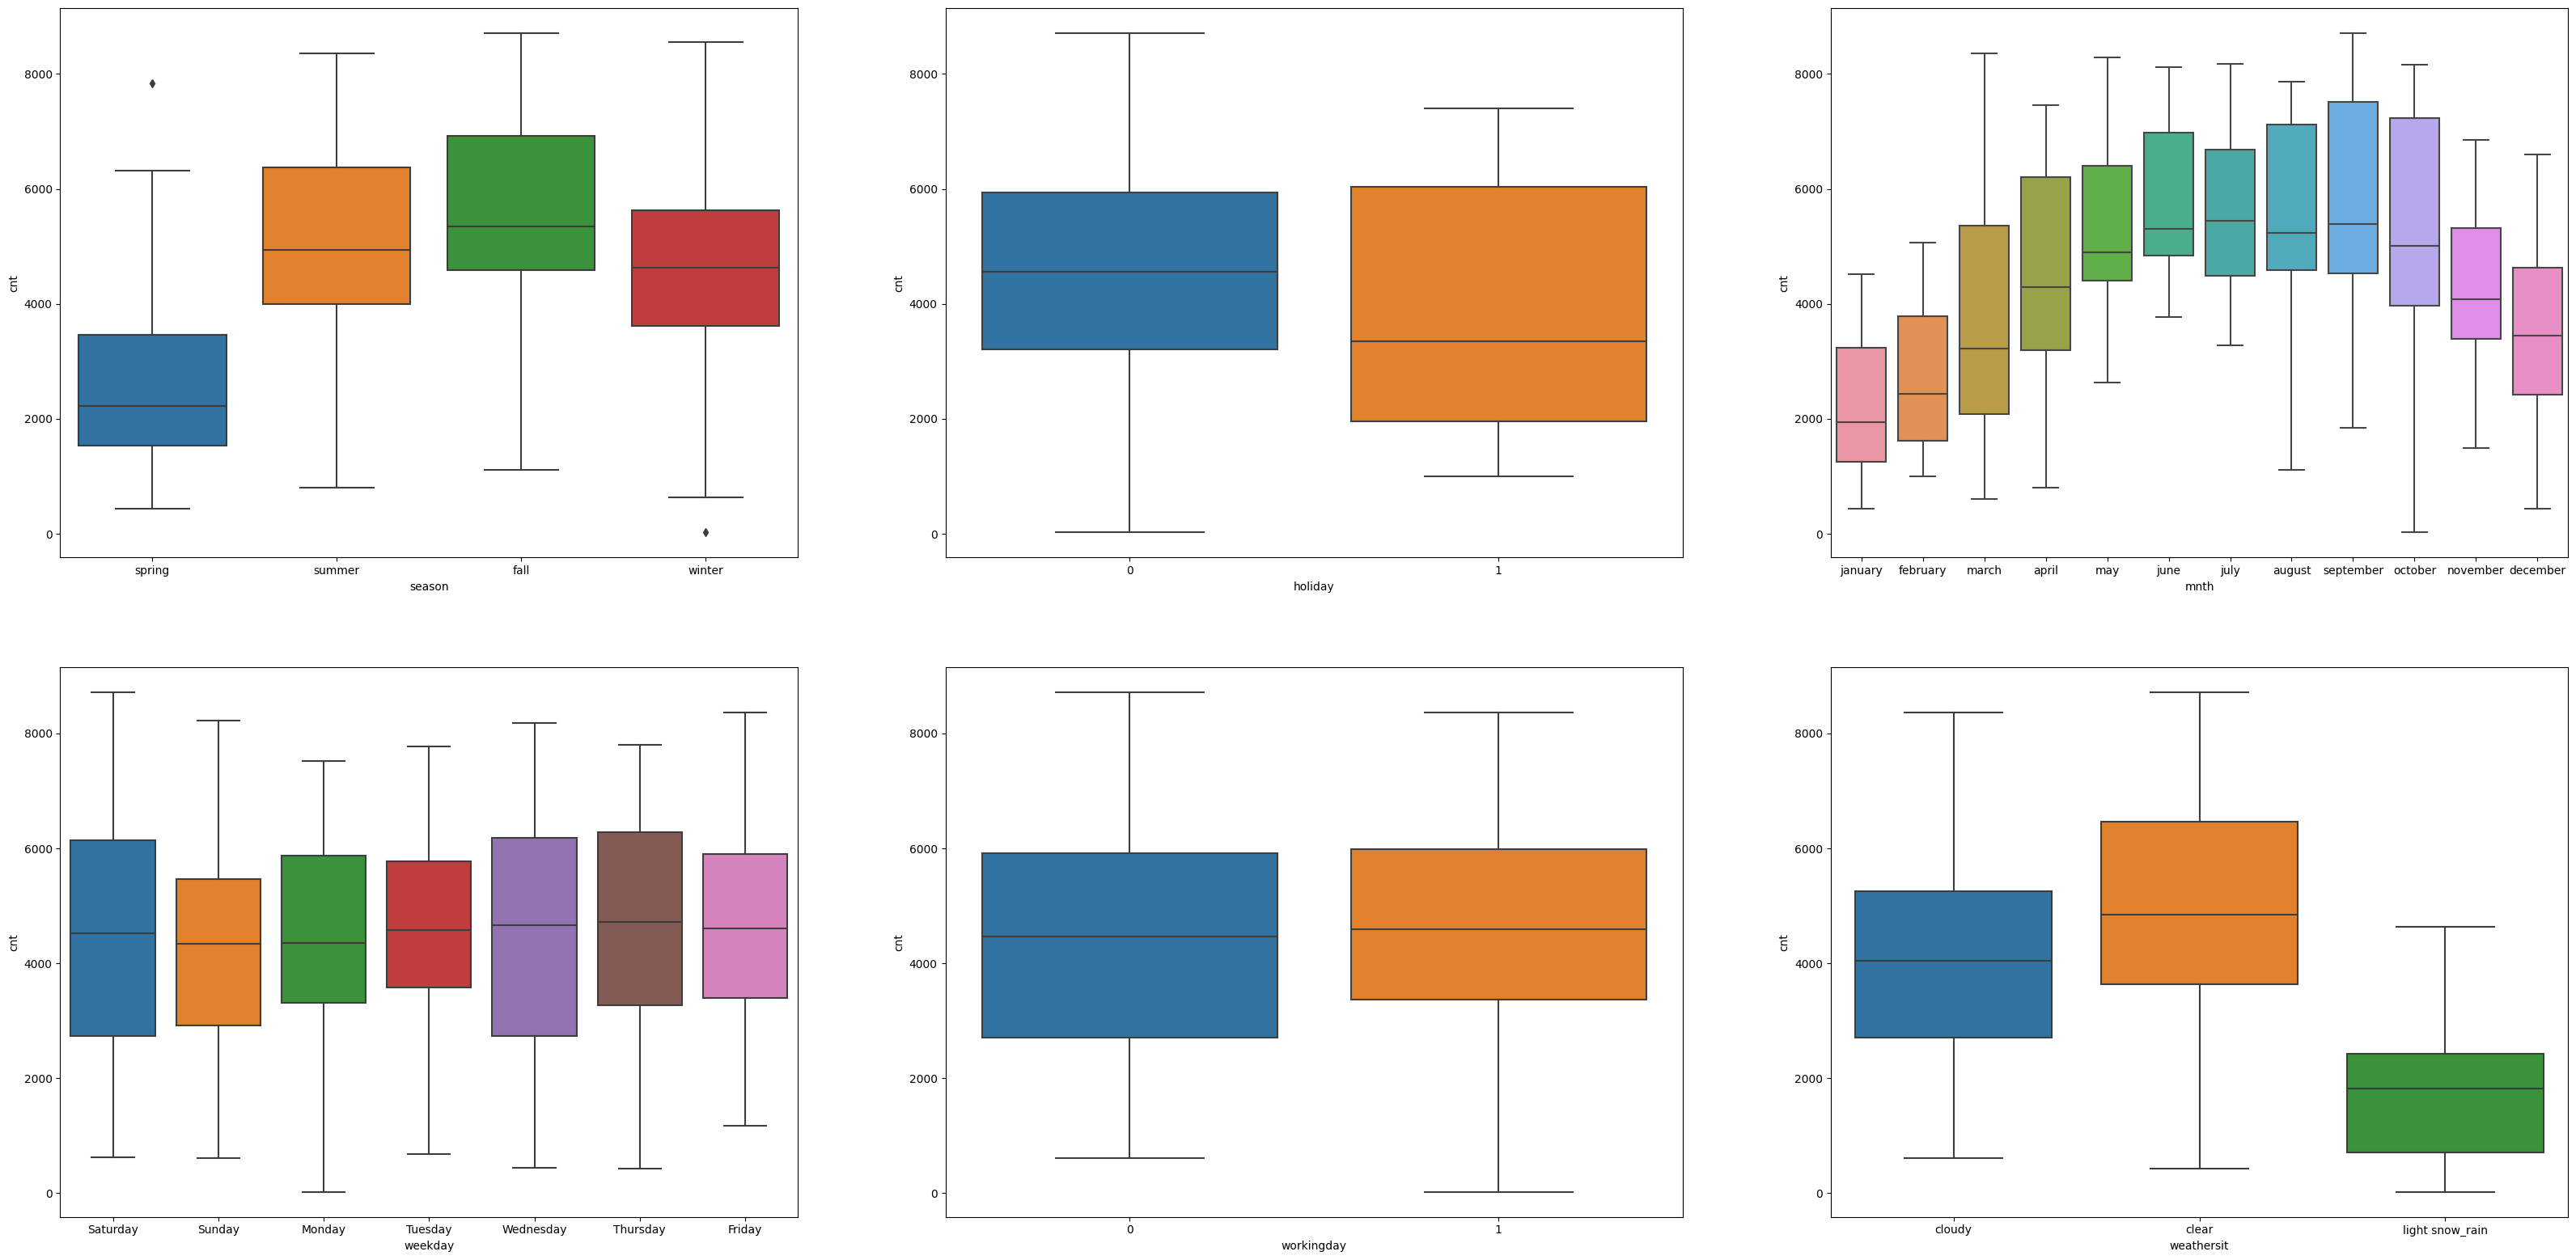

In [207]:
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
fig=plt.figure(figsize=(40,30))
fig.add_subplot(3,3,1)
seaborn.boxplot(x='season',y='cnt',data=bike_raw_dataframe)
fig.add_subplot(3,3,2)
seaborn.boxplot(x='holiday',y='cnt',data=bike_raw_dataframe)
fig.add_subplot(3,3,3)
seaborn.boxplot(x='mnth',y='cnt',data=bike_raw_dataframe)
fig.add_subplot(3,3,4)
seaborn.boxplot(x='weekday',y='cnt',data=bike_raw_dataframe)
fig.add_subplot(3,3,5)
seaborn.boxplot(x='workingday',y='cnt',data=bike_raw_dataframe)
fig.add_subplot(3,3,6)
seaborn.boxplot(x='weathersit',y='cnt',data=bike_raw_dataframe)



#### Removing the outlier we observed in Graph for Season 

In [208]:
bike_raw_dataframe.drop(bike_raw_dataframe[(bike_raw_dataframe['season']=='spring') & (bike_raw_dataframe['cnt']>6300)].index,inplace=True)

## Skewness Check and Skewness Removal in Numerical Columns

#### Checking Skewness in the Numerical Columns Temprature

-0.055082380076152626

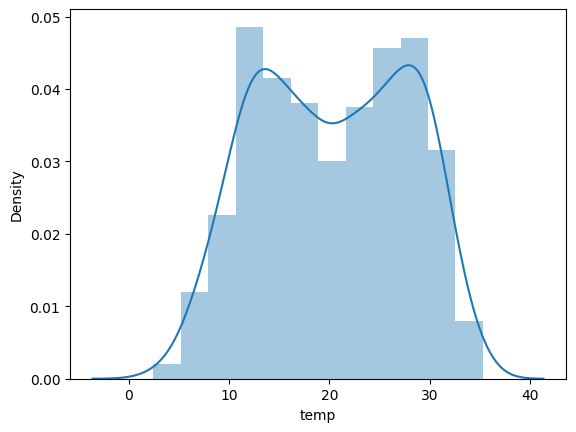

In [209]:
numerical_vars=['temp','atemp','hum','windspeed','cnt']
seaborn.distplot(bike_raw_dataframe['temp'],kde=True)
bike_raw_dataframe['temp'].skew()

#### Checking Skewness in the Numerical Columns Windspeed

0.6726952901705223

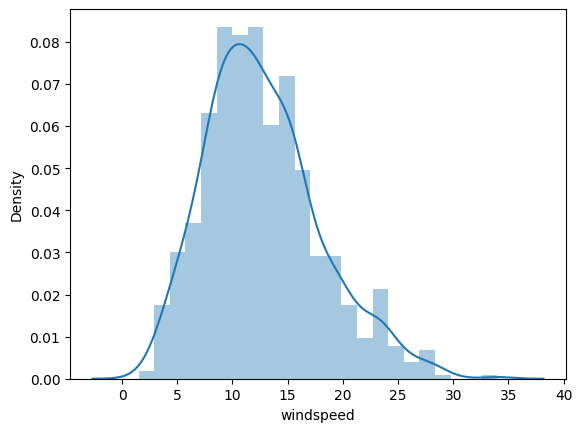

In [210]:
seaborn.distplot(bike_raw_dataframe['windspeed'],kde=True)
bike_raw_dataframe['windspeed'].skew()

#### Checking Skewness in the Numerical Columns ATemp

-0.1310820446584857

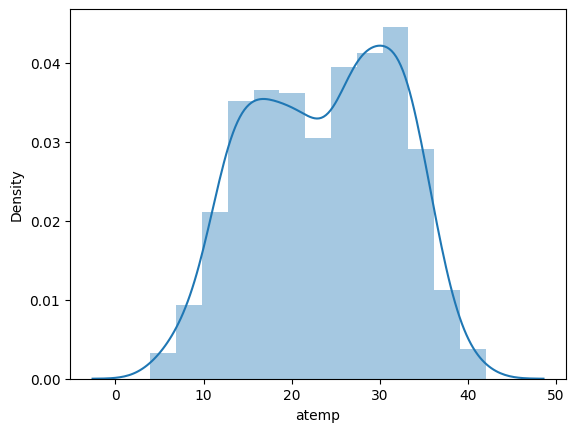

In [211]:
seaborn.distplot(bike_raw_dataframe['atemp'],kde=True)
bike_raw_dataframe['atemp'].skew()

#### Checking Skewness in the Numerical Columns Humidity

-0.06754397155614854

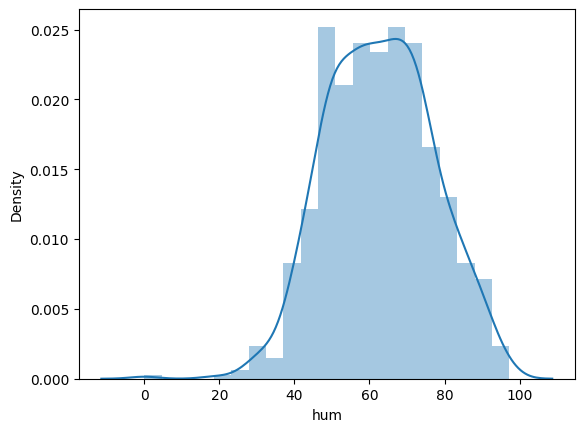

In [212]:
seaborn.distplot(bike_raw_dataframe['hum'],kde=True)
bike_raw_dataframe['hum'].skew()

#### Since we observed skewness in the Windspeed Column.We will apply BoxCox Transformation to make it normally distributed

<Axes: xlabel='windspeed', ylabel='Density'>

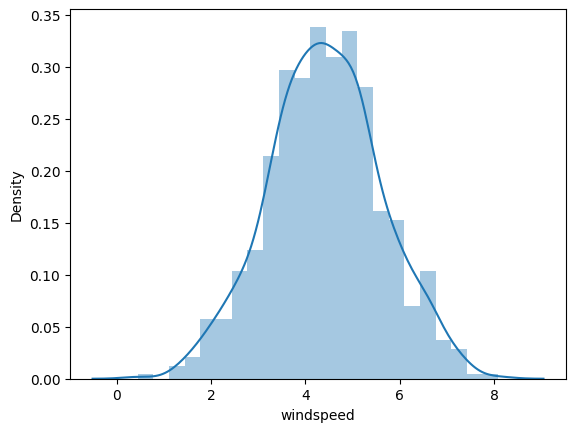

In [213]:
bike_raw_dataframe['windspeed']=stats.boxcox(bike_raw_dataframe['windspeed'])[0]
bike_raw_dataframe['windspeed'].skew()
seaborn.distplot(bike_raw_dataframe['windspeed'],kde=True)

## Correlation Graph between Variable

#### Plotting a heatmap between the variable to observed correlation

<Axes: >

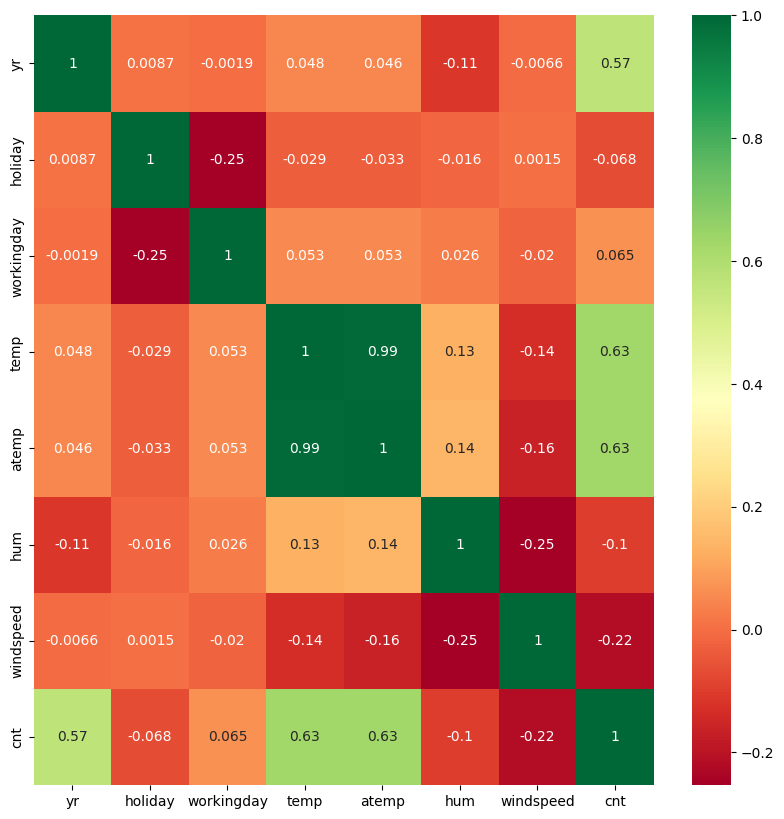

In [214]:
plt.figure(figsize=(10,10))
seaborn.heatmap(bike_raw_dataframe.corr(),cmap='RdYlGn', annot = True)

## Dummy Variable Creation

#### Creating Dummy Variables for the Categorical Variables

In [215]:
seasons = pandas.get_dummies(bike_raw_dataframe['season'],drop_first=True)

weather= pandas.get_dummies(bike_raw_dataframe['weathersit'],drop_first=True)

month= pandas.get_dummies(bike_raw_dataframe['mnth'],drop_first=True)

week_day= pandas.get_dummies(bike_raw_dataframe['weekday'],drop_first=True)


In [216]:
bike_dataframe=pandas.concat([bike_raw_dataframe,seasons,weather,month,week_day],axis=1)

#### We will drop the Categorical Columns since we have the dummy variables present

In [217]:
bike_dataframe.drop(['season','weathersit','mnth','weekday','atemp'],axis=1,inplace=True)

In [218]:
bike_dataframe.shape

(728, 29)

## Model Creation and Feature Selection
### Parameters and Assumption
##### Multicollinearity < 5 and P-value <.05
##### Error values should be normally distributed
##### Mean of Error should be zero

#### Getting the Target Column in variable Y

In [219]:
Y=bike_dataframe.pop('cnt')

#### Splitting the Data in Test and Train

In [220]:
X_train,X_test,Y_train,Y_test=train_test_split(bike_dataframe,Y,test_size=0.7,random_state=42)

#### Applying Min-Max scaling on the variables

In [221]:
minmaxscaler=MinMaxScaler()
X_train['temp']=minmaxscaler.fit_transform(X_train['temp'].values.reshape(-1,1))
X_train['hum']=minmaxscaler.fit_transform(X_train['hum'].values.reshape(-1,1))
X_train['windspeed']=minmaxscaler.fit_transform(X_train['windspeed'].values.reshape(-1,1))



In [222]:
X_train.head(10)
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'light snow_rain', 'august', 'december',
       'february', 'january', 'july', 'june', 'march', 'may', 'november',
       'october', 'september', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

#### Applying RFE on the Training Dataset

In [223]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, Y_train)

#### Below are the Columns which RFE support

In [224]:
col_support=X_train.columns[rfe.support_]
col_support

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'cloudy', 'light snow_rain', 'august', 'december', 'july', 'november',
       'october', 'september'],
      dtype='object')

#### Columns which RE does not support

In [225]:
X_train.columns[~rfe.support_]

Index(['workingday', 'winter', 'february', 'january', 'june', 'march', 'may',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Creating Dataset from the RFE selected Columns

In [226]:
X_Train_RFE=X_train[col_support]


In [227]:
def get_sm_model(dependent_var,independent_var):
    X_Train_RFE=sm.add_constant(independent_var)
    predict_model=sm.OLS(dependent_var,X_Train_RFE).fit()
    return predict_model

#### Creating a Model from the features that were selected and printing out the summary

In [228]:
model_1=get_sm_model(dependent_var=Y_train,independent_var=X_Train_RFE)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     87.31
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.50e-79
Time:                        20:35:35   Log-Likelihood:                -1735.5
No. Observations:                 218   AIC:                             3503.
Df Residuals:                     202   BIC:                             3557.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4775.6491    512.376      9.321      0.000    3765.357    5785.941
yr               2111.5691    101.743     20.754      0.000    1910.954    2312.184
holiday          -728.9450    310.577     -2.347      0.020   -1341.334    -116.556
temp             3493.8739    427.231      8.178      0.000    2651.470    4336.278
hum              -731.6111    360.423     -2.030      0.044   -1442.285     -20.937
windspeed       -1275.0245    315.248     -4.045      0.000   -1896.624    -653.425
spring          -2910.6179    384.441     -7.571      0.000   -3668.650   -2152.586
summer          -1687.8063    388.908     -4.340      0.000   -2454.646    -920.967
cloudy           -558.9580    132.298     -4.225      0.000    -819.821    -298.095
light snow_rain -2009.9359    328.895     -6.111      0.000   -2658.444   -1361.428
august          -1693.6275    426.828     -3.968      0.000   -2535.238    -852.017
december        -1336.6564    356.820     -3.746      0.000   -2040.226    -633.087
july            -2012.7142    425.978     -4.725      0.000   -2852.648   -1172.780
november        -1399.0601    422.949     -3.308      0.001   -2233.021    -565.100
october          -798.1561    414.833     -1.924      0.056   -1616.114      19.802
september        -944.4353    426.524     -2.214      0.028   -1785.446    -103.424
==============================================================================
Omnibus:                       24.200   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.229
Skew:                          -0.706   Prob(JB):                     6.09e-08
Kurtosis:                       4.290   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Determining Multicollinerity in the columns

In [229]:
VIF_dataframe=pandas.DataFrame()
X_VIF=sm.add_constant(X_Train_RFE)
VIF_dataframe['features']=X_VIF.columns
VIF_dataframe['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(VIF_dataframe)


           features         VIF
0             const  110.181615
1                yr    1.076985
2           holiday    1.083539
3              temp    4.063570
4               hum    2.162444
5         windspeed    1.230500
6            spring   10.650445
7            summer   12.662510
8            cloudy    1.774625
9   light snow_rain    1.410956
10           august    6.083185
11         december    3.634025
12             july    7.461142
13         november    5.398066
14          october    6.018103
15        september    5.489726


#### Dropping Summer Column  because of High P Value and High Collinearity

In [230]:
X_Train_RFE_2=X_Train_RFE.drop(['summer'],axis=1)
model_2=get_sm_model(dependent_var=Y_train,independent_var=X_Train_RFE_2)
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     84.75
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.18e-76
Time:                        20:35:35   Log-Likelihood:                -1745.2
No. Observations:                 218   AIC:                             3520.
Df Residuals:                     203   BIC:                             3571.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3285.2920    396.613      8.283      0.000    2503.283    4067.301
yr               2117.0803    106.110     19.952      0.000    1907.861    2326.299
holiday          -903.4235    321.207     -2.813      0.005   -1536.754    -270.093
temp             3370.6990    444.618      7.581      0.000    2494.037    4247.361
hum              -817.6447    375.353     -2.178      0.031   -1557.736     -77.554
windspeed       -1229.2596    328.621     -3.741      0.000   -1877.207    -581.312
spring          -1451.6957    194.531     -7.463      0.000   -1835.256   -1068.136
cloudy           -582.9032    137.867     -4.228      0.000    -854.739    -311.067
light snow_rain -1967.9679    342.890     -5.739      0.000   -2644.051   -1291.885
august            -75.5706    216.723     -0.349      0.728    -502.887     351.746
december         -119.2805    230.016     -0.519      0.605    -572.807     334.246
july             -391.2732    213.417     -1.833      0.068    -812.071      29.525
november          170.8723    228.569      0.748      0.456    -279.801     621.546
october           800.4983    198.974      4.023      0.000     408.177    1192.819
september         678.1486    214.101      3.167      0.002     256.001    1100.296
==============================================================================
Omnibus:                       28.045   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.792
Skew:                          -0.800   Prob(JB):                     3.77e-09
Kurtosis:                       4.308   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping August Column  because of High P Value 

In [231]:
X_Train_RFE_3=X_Train_RFE_2.drop(['august'],axis=1)
model_3=get_sm_model(dependent_var=Y_train,independent_var=X_Train_RFE_3)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     91.66
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.28e-77
Time:                        20:35:36   Log-Likelihood:                -1745.3
No. Observations:                 218   AIC:                             3519.
Df Residuals:                     204   BIC:                             3566.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3299.3459    393.709      8.380      0.000    2523.085    4075.607
yr               2120.2891    105.482     20.101      0.000    1912.314    2328.265
holiday          -897.5365    320.072     -2.804      0.006   -1528.610    -266.463
temp             3306.8844    404.334      8.179      0.000    2509.675    4104.094
hum              -803.9438    372.486     -2.158      0.032   -1538.361     -69.527
windspeed       -1224.6518    327.647     -3.738      0.000   -1870.661    -578.643
spring          -1457.4743    193.406     -7.536      0.000   -1838.805   -1076.144
cloudy           -587.3265    136.987     -4.287      0.000    -857.418    -317.235
light snow_rain -1972.5821    341.896     -5.770      0.000   -2646.686   -1298.479
december         -120.9535    229.470     -0.527      0.599    -573.391     331.484
july             -360.7445    194.213     -1.857      0.065    -743.666      22.177
november          170.8990    228.076      0.749      0.455    -278.790     620.588
october           811.0830    196.221      4.134      0.000     424.202    1197.965
september         699.3206    204.869      3.414      0.001     295.389    1103.252
==============================================================================
Omnibus:                       27.424   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.657
Skew:                          -0.788   Prob(JB):                     6.65e-09
Kurtosis:                       4.289   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping November Column  because of High P Value 

In [232]:
X_Train_RFE_4=X_Train_RFE_3.drop(['november'],axis=1)
model_4=get_sm_model(dependent_var=Y_train,independent_var=X_Train_RFE_4)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.46
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.66e-78
Time:                        20:35:36   Log-Likelihood:                -1745.6
No. Observations:                 218   AIC:                             3517.
Df Residuals:                     205   BIC:                             3561.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3402.0218    368.699      9.227      0.000    2675.093    4128.950
yr               2129.4581    104.658     20.347      0.000    1923.114    2335.802
holiday          -870.6646    317.716     -2.740      0.007   -1497.075    -244.254
temp             3164.5019    356.520      8.876      0.000    2461.586    3867.418
hum              -767.4999    368.902     -2.080      0.039   -1494.829     -40.171
windspeed       -1236.9938    326.883     -3.784      0.000   -1881.477    -592.511
spring          -1528.0336    168.753     -9.055      0.000   -1860.747   -1195.320
cloudy           -597.7581    136.132     -4.391      0.000    -866.156    -329.360
light snow_rain -1986.6595    341.014     -5.826      0.000   -2659.005   -1314.314
december         -175.6057    217.337     -0.808      0.420    -604.109     252.897
july             -355.7933    193.892     -1.835      0.068    -738.072      26.486
october           770.4909    188.393      4.090      0.000     399.055    1141.927
september         682.8554    203.469      3.356      0.001     281.695    1084.016
==============================================================================
Omnibus:                       25.682   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.708
Skew:                          -0.770   Prob(JB):                     4.79e-08
Kurtosis:                       4.156   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping December Column  because of High P Value 

In [233]:
X_Train_RFE_5=X_Train_RFE_4.drop(['december'],axis=1)
model_5=get_sm_model(dependent_var=Y_train,independent_var=X_Train_RFE_5)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           2.14e-79
Time:                        20:35:36   Log-Likelihood:                -1745.9
No. Observations:                 218   AIC:                             3516.
Df Residuals:                     206   BIC:                             3556.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3315.9214    352.667      9.402      0.000    2620.623    4011.220
yr               2126.2619    104.495     20.348      0.000    1920.245    2332.279
holiday          -888.5086    316.681     -2.806      0.006   -1512.859    -264.158
temp             3264.9023    333.883      9.779      0.000    2606.637    3923.168
hum              -808.7193    365.050     -2.215      0.028   -1528.432     -89.007
windspeed       -1187.3129    320.777     -3.701      0.000   -1819.740    -554.886
spring          -1494.9144    163.561     -9.140      0.000   -1817.382   -1172.446
cloudy           -592.1041    135.837     -4.359      0.000    -859.913    -324.295
light snow_rain -1979.5740    340.614     -5.812      0.000   -2651.111   -1308.037
july             -360.2882    193.649     -1.861      0.064    -742.077      21.500
october           798.8776    184.932      4.320      0.000     434.275    1163.480
september         695.9577    202.651      3.434      0.001     296.422    1095.493
==============================================================================
Omnibus:                       27.068   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.923
Skew:                          -0.800   Prob(JB):                     1.58e-08
Kurtosis:                       4.181   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping July Column  because of High P Value 

In [234]:
X_Train_RFE_6=X_Train_RFE_5.drop(['july'],axis=1)
model_6=get_sm_model(dependent_var=Y_train,independent_var=X_Train_RFE_6)
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.06e-79
Time:                        20:35:36   Log-Likelihood:                -1747.8
No. Observations:                 218   AIC:                             3518.
Df Residuals:                     207   BIC:                             3555.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3381.3714    352.988      9.579      0.000    2685.459    4077.284
yr               2125.3490    105.113     20.220      0.000    1918.119    2332.579
holiday          -856.1107    318.076     -2.692      0.008   -1483.194    -229.027
temp             2974.8916    297.013     10.016      0.000    2389.332    3560.451
hum              -773.5959    366.723     -2.109      0.036   -1496.586     -50.606
windspeed       -1129.1992    321.145     -3.516      0.001   -1762.334    -496.064
spring          -1533.7395    163.186     -9.399      0.000   -1855.459   -1212.020
cloudy           -589.1455    136.633     -4.312      0.000    -858.516    -319.775
light snow_rain -2025.8591    341.718     -5.928      0.000   -2699.553   -1352.165
october           844.0274    184.420      4.577      0.000     480.445    1207.609
september         782.4000    198.422      3.943      0.000     391.213    1173.587
==============================================================================
Omnibus:                       27.484   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.450
Skew:                          -0.812   Prob(JB):                     1.22e-08
Kurtosis:                       4.173   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking Collinearity among remaining Columns

In [235]:
VIF_dataframe=pandas.DataFrame()
X_VIF=sm.add_constant(X_Train_RFE_6)
VIF_dataframe['features']=X_VIF.columns
VIF_dataframe['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(VIF_dataframe)

           features        VIF
0             const  47.894160
1                yr   1.052807
2           holiday   1.040876
3              temp   1.798736
4               hum   2.050344
5         windspeed   1.169530
6            spring   1.757541
7            cloudy   1.733568
8   light snow_rain   1.394977
9           october   1.089332
10        september   1.088116


#### Getting the predicted Values for the Training Dataset and performing Residual Analysis

In [236]:
X_Train_RFE_const=sm.add_constant(X_Train_RFE_6)


#### Plotting Graph between Errors and we observe that they are normally distributed along 0

<Axes: ylabel='Density'>

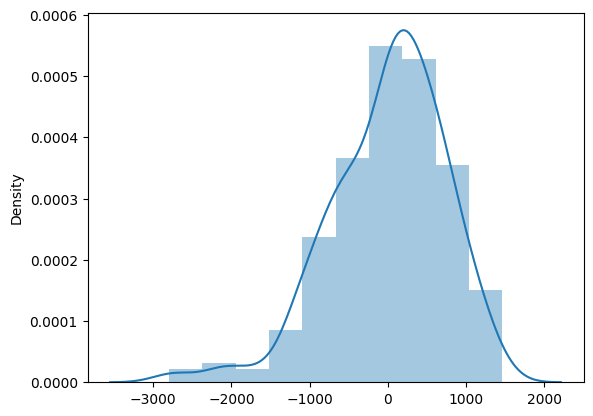

In [237]:
Y_train_predict=model_6.predict(X_Train_RFE_const)
seaborn.distplot(Y_train-Y_train_predict,kde=True,bins=10)

#### Mean of the error is also zero

In [238]:
int((Y_train-Y_train_predict).mean())

0

### Applying Model on Test Dataset

#### Scaling the Test Data based on min-max scaling

In [239]:
X_test['temp']=minmaxscaler.fit_transform(X_test['temp'].values.reshape(-1,1))
X_test['hum']=minmaxscaler.fit_transform(X_test['hum'].values.reshape(-1,1))
X_test['windspeed']=minmaxscaler.fit_transform(X_test['windspeed'].values.reshape(-1,1))

#### Predicting values for the test dataset

In [240]:
X_test_RFE=X_test[X_Train_RFE_6.columns]
X_test_const=sm.add_constant(X_test_RFE)
Y_predict=model_6.predict(X_test_const)


#### Performing Residual Analysis on the Test values

<Axes: ylabel='Density'>

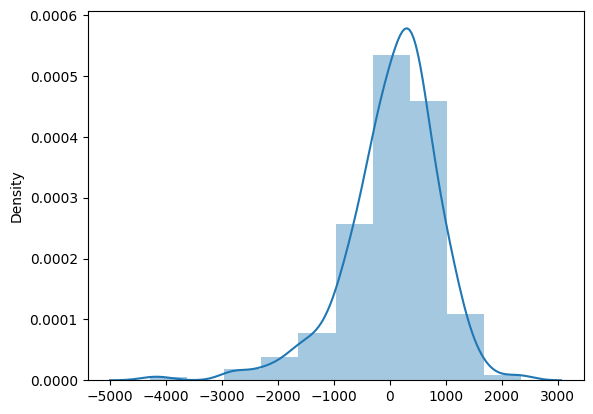

In [241]:
seaborn.distplot(Y_test-Y_predict,kde=True,bins=10)

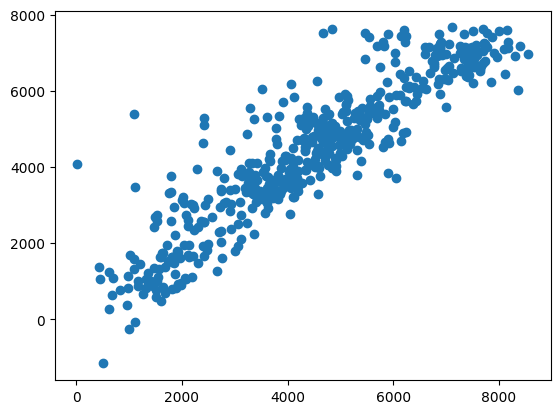

In [242]:
plt.scatter(Y_test,Y_predict)



<Axes: xlabel='cnt'>

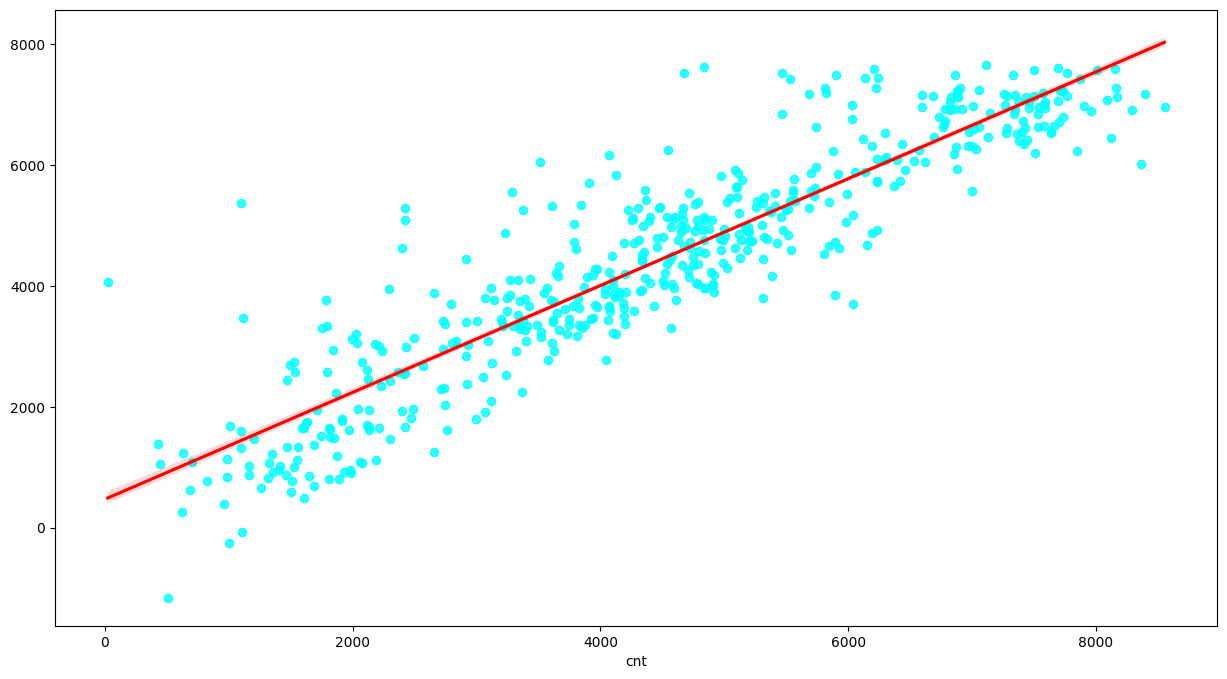

In [243]:
plt.figure(figsize=(15,8))
seaborn.regplot(x=Y_test, y=Y_predict, ci=68, fit_reg=True,scatter_kws={"color": "cyan"}, line_kws={"color": "red"})

## Feature Coffecients

In [244]:
model_1.params

const              4775.649051
yr                 2111.569089
holiday            -728.945049
temp               3493.873913
hum                -731.611131
windspeed         -1275.024515
spring            -2910.617891
summer            -1687.806323
cloudy             -558.958026
light snow_rain   -2009.935903
august            -1693.627482
december          -1336.656385
july              -2012.714243
november          -1399.060094
october            -798.156137
september          -944.435306
dtype: float64

## Model Evaluation Parameters

In [245]:
r2_score(Y_test,Y_predict)
mean_squared_error(Y_test,Y_predict)
rmse=numpy.sqrt(mean_squared_error(Y_test,Y_predict))
print("R2 Score of the model on the Train Dataset {}".format(r2_score(Y_train,Y_train_predict)))
print("R2 Score of the model on the Test Dataset {}".format(r2_score(Y_test,Y_predict)))


R2 Score of the model on the Train Dataset 0.8504799608453713
R2 Score of the model on the Test Dataset 0.819033897236972
